In [294]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
import torch 
import torchvision
import torch.nn as nn

## Zadanie 1

Train the neural network on the data from file `data.npy`. 

In [296]:
data = np.loadtxt('data.npy').astype('float32')

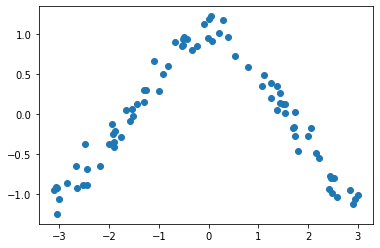

In [297]:
plt.scatter(data[:,0], data[:,1]);

In [298]:
t_xs = torch.from_numpy(data[:,0]).view(-1,1)
t_ys = torch.from_numpy(data[:,1]).view(-1,1)

In [332]:
class NNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(NNModel, self).__init__()
        
        self.lin1 = nn.Linear(input_dim, hidden_dim1)
        self.afunc1 = nn.ReLU()
        
        self.lin2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.afunc2 = nn.Sigmoid()
        
        self.lin3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.afunc3 = nn.ReLU()
        
        self.lin4 = nn.Linear(hidden_dim3, output_dim)
    
    def forward(self, x):
        out = self.lin4(
            self.afunc3(
                self.lin3(
                    self.afunc2(
                        self.lin2(
                            self.afunc1(
                                self.lin1(x)
                            )
                        )
                    )
                )
            )
        )
        return out
        

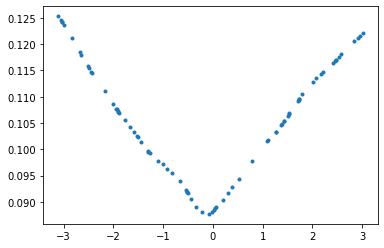

In [333]:
model = NNModel(1, 128, 128, 128, 1)
t_out = model(t_xs)
plt.plot(t_xs.view(-1).numpy(), t_out.data.view(-1).numpy(),'.');

In [334]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)

In [335]:
loader = torch.utils.data.DataLoader(dataset,batch_size=len(dataset))

In [336]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [337]:
loss_func = torch.nn.MSELoss()

In [338]:
%%time
for epoch in range(2000):    
    for features, target in loader:
        optimizer.zero_grad()
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    if epoch%10 == 0:
        print("epoch %d %f" % (epoch, loss.item()))   

epoch 0 0.526837
epoch 10 0.427541
epoch 20 0.548992
epoch 30 0.350905
epoch 40 0.505021
epoch 50 0.407475
epoch 60 0.306416
epoch 70 0.362514
epoch 80 0.339752
epoch 90 0.331054
epoch 100 0.234217
epoch 110 0.623281
epoch 120 0.247207
epoch 130 0.030504
epoch 140 0.048853
epoch 150 0.092564
epoch 160 0.087467
epoch 170 0.079552
epoch 180 0.072814
epoch 190 0.066370
epoch 200 0.062831
epoch 210 0.057621
epoch 220 0.050827
epoch 230 0.047817
epoch 240 0.045038
epoch 250 0.043798
epoch 260 0.042667
epoch 270 0.040421
epoch 280 0.038043
epoch 290 0.036408
epoch 300 0.035614
epoch 310 0.033185
epoch 320 0.033853
epoch 330 0.033178
epoch 340 0.031047
epoch 350 0.030790
epoch 360 0.030201
epoch 370 0.028757
epoch 380 0.027743
epoch 390 0.027379
epoch 400 0.026897
epoch 410 0.026340
epoch 420 0.026215
epoch 430 0.025672
epoch 440 0.025164
epoch 450 0.024989
epoch 460 0.024996
epoch 470 0.025477
epoch 480 0.025505
epoch 490 0.025135
epoch 500 0.025139
epoch 510 0.024610
epoch 520 0.023997
epoc

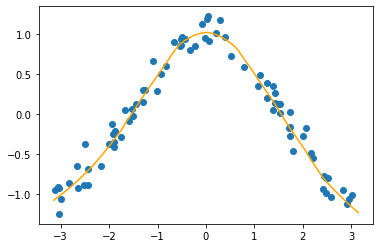

In [339]:
t_xs_lin = torch.linspace(-np.pi, np.pi)
t_out = model(t_xs_lin.view(-1,1))
plt.scatter(data[:,0], data[:,1]);
plt.plot(t_xs_lin.view(-1).numpy(), t_out.data.view(-1).numpy(),'-',c='orange');